In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-227-1 again.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Ester fuel,...,Phenol waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Fuel dimer,Alanine waste,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,-360,0.000000,5159.23,6.000000,0.0000,0.000000,0,0,1.0,48.000000,...,0.000000,1.0,0.000,0.0000,0.00,0.000000,0.000000,29381.8,5.694997,--
1,0,6.000000,3737.43,5.896323,65.7164,0.103677,0,0,51524.3,45.616408,...,1.718118,79805.9,718.923,277.2930,3950.43,0.156534,2.230048,22322.7,5.869535,NaN
2,290,10.833333,1892.90,5.909651,28.9395,0.090349,0,0,25947.8,44.879355,...,2.359802,41970.6,273.754,60.0891,2706.14,0.063995,2.882023,11810.6,6.145466,NaN
3,540,15.000000,1873.93,5.902265,31.0303,0.097735,0,0,25637.2,44.232886,...,2.987091,41760.8,399.503,186.6060,3614.26,0.194096,3.759325,11827.3,6.208686,NaN
4,791,19.183333,1885.84,5.905147,30.2918,0.094853,0,0,25289.1,43.621006,...,3.613772,41010.6,267.246,89.4443,4144.35,0.094150,4.362370,11855.8,6.187361,NaN


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Fuel,...,Waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Fuel dimer,Alanine waste,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,-360,0.000000,5159.23,6.000000,0.0000,0.000000,0,0,1.0,48.000000,...,0.000000,1.0,0.000,0.0000,0.00,0.000000,0.000000,29381.8,5.694997,--
1,0,6.000000,3737.43,5.896323,65.7164,0.103677,0,0,51524.3,45.616408,...,1.718118,79805.9,718.923,277.2930,3950.43,0.156534,2.230048,22322.7,5.869535,NaN
2,290,10.833333,1892.90,5.909651,28.9395,0.090349,0,0,25947.8,44.879355,...,2.359802,41970.6,273.754,60.0891,2706.14,0.063995,2.882023,11810.6,6.145466,NaN
3,540,15.000000,1873.93,5.902265,31.0303,0.097735,0,0,25637.2,44.232886,...,2.987091,41760.8,399.503,186.6060,3614.26,0.194096,3.759325,11827.3,6.208686,NaN
4,791,19.183333,1885.84,5.905147,30.2918,0.094853,0,0,25289.1,43.621006,...,3.613772,41010.6,267.246,89.4443,4144.35,0.094150,4.362370,11855.8,6.187361,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        4.109346e-03 1.257177e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   4
Objective              <symfit.core.objectives.LeastSquares object at 0x7fccecbe2c40>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fccecbe2b20>

Goodness of fit qualifiers:
chi_squared            5.37599181331362
objective_value        2.68799590665681
r_squared              0.9424743157182701


<IPython.core.display.Javascript object>


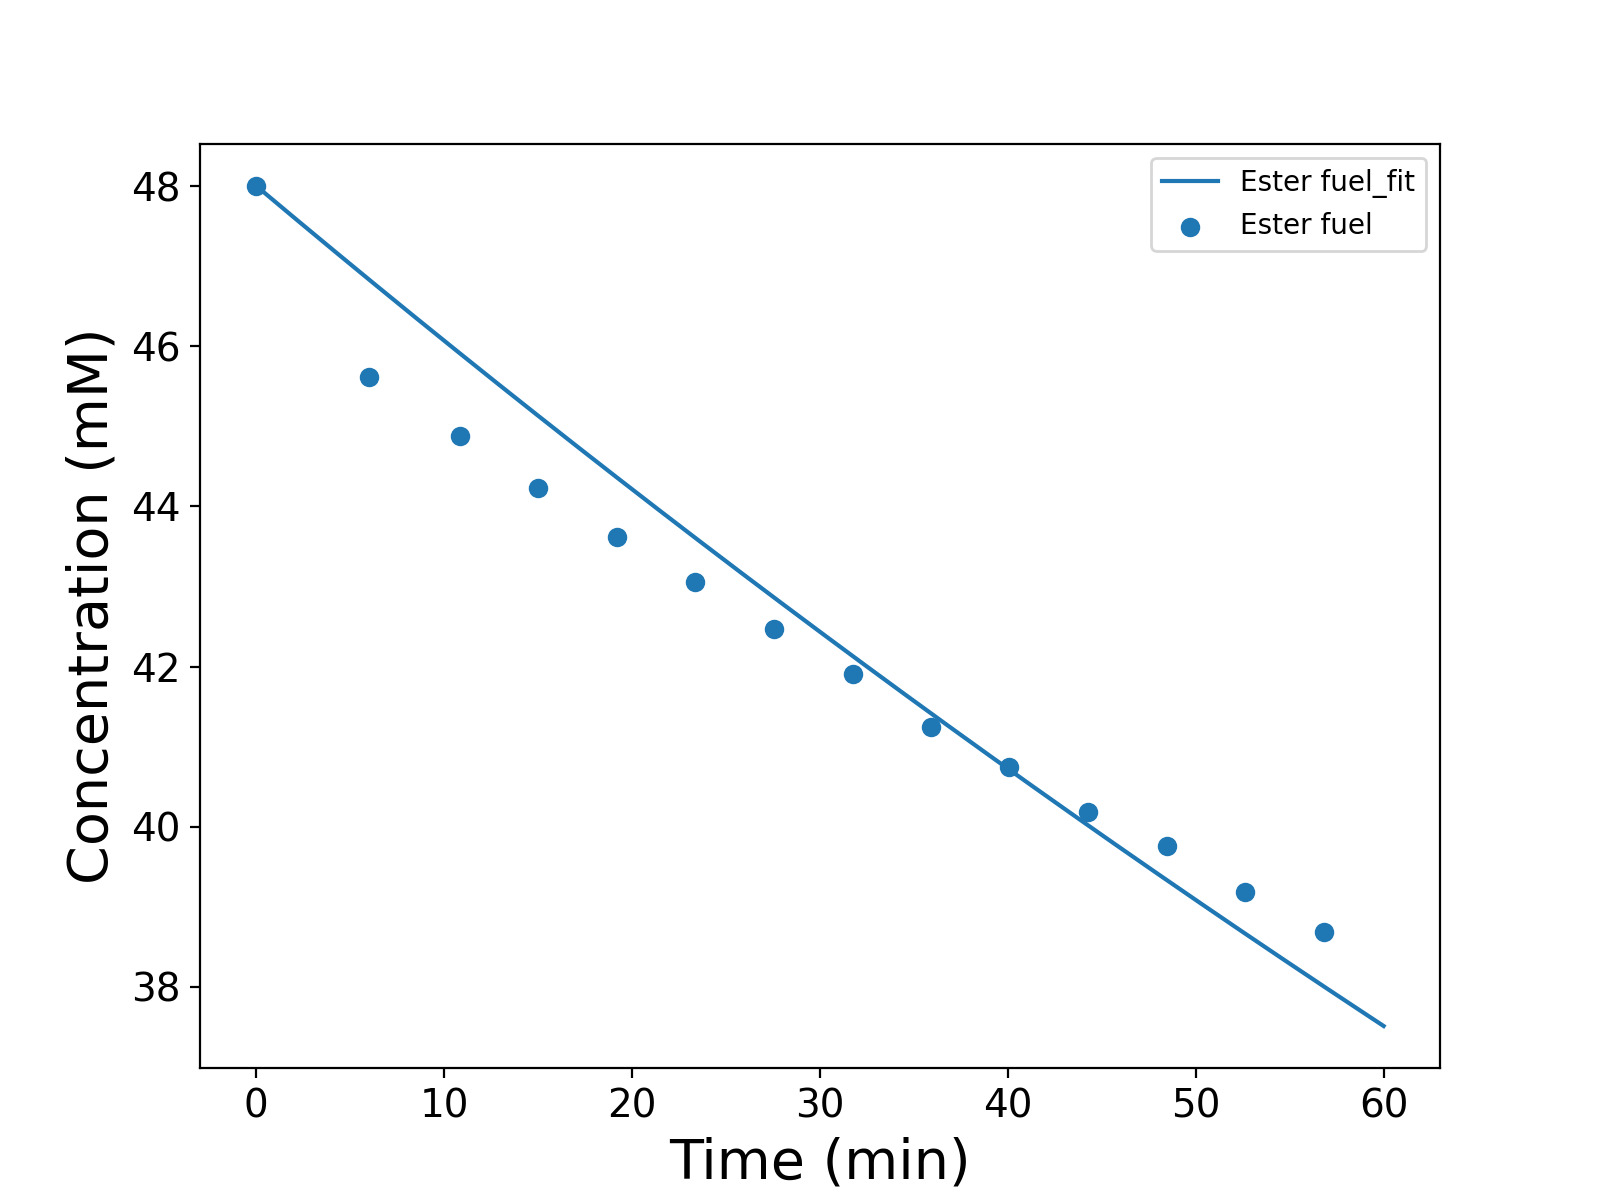

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-227-1 again (pH 6.10) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-227-2.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Unnamed: 6,Ester fuel,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Fuel dimer,Alanine waste,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,-360,0.000000,3950.52,6.000000,0.0000,0.000000,1.0,48.000000,0.000,0.000000,...,1.0,0.000,0.0000,0.000,0.00,0.000000,0.000000,26207.1,--,--
1,0,6.000000,3171.44,5.597512,228.0420,0.402488,52292.2,44.361637,853.651,0.533055,...,80912.8,970.867,86.7892,479.909,5471.52,0.047382,2.987117,21992.4,0,NaN
2,275,10.583333,1534.64,5.519335,133.6480,0.480665,25263.7,42.773366,463.125,0.560796,...,40813.9,477.650,135.4970,323.874,4570.84,0.140406,4.736442,11235.7,0,NaN
3,526,14.766667,1562.10,5.676753,88.9495,0.323247,24376.8,41.424922,479.095,0.665425,...,39508.9,419.564,182.9490,385.348,6034.50,0.188724,6.224976,11188.3,0,NaN
4,777,18.950000,1569.35,5.676907,89.3172,0.323093,23393.4,40.105647,451.364,0.623072,...,37647.8,180.382,74.7259,255.100,7160.78,0.079147,7.584436,11176.5,0,NaN


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Unnamed: 6,Fuel,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Fuel dimer,Alanine waste,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,-360,0.000000,3950.52,6.000000,0.0000,0.000000,1.0,48.000000,0.000,0.000000,...,1.0,0.000,0.0000,0.000,0.00,0.000000,0.000000,26207.1,--,--
1,0,6.000000,3171.44,5.597512,228.0420,0.402488,52292.2,44.361637,853.651,0.533055,...,80912.8,970.867,86.7892,479.909,5471.52,0.047382,2.987117,21992.4,0,NaN
2,275,10.583333,1534.64,5.519335,133.6480,0.480665,25263.7,42.773366,463.125,0.560796,...,40813.9,477.650,135.4970,323.874,4570.84,0.140406,4.736442,11235.7,0,NaN
3,526,14.766667,1562.10,5.676753,88.9495,0.323247,24376.8,41.424922,479.095,0.665425,...,39508.9,419.564,182.9490,385.348,6034.50,0.188724,6.224976,11188.3,0,NaN
4,777,18.950000,1569.35,5.676907,89.3172,0.323093,23393.4,40.105647,451.364,0.623072,...,37647.8,180.382,74.7259,255.100,7160.78,0.079147,7.584436,11176.5,0,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        8.540706e-03 1.611413e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fccec24dd90>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fccec24dfd0>

Goodness of fit qualifiers:
chi_squared            6.011066820440217
objective_value        3.0055334102201083
r_squared              0.9833230338764668


<IPython.core.display.Javascript object>


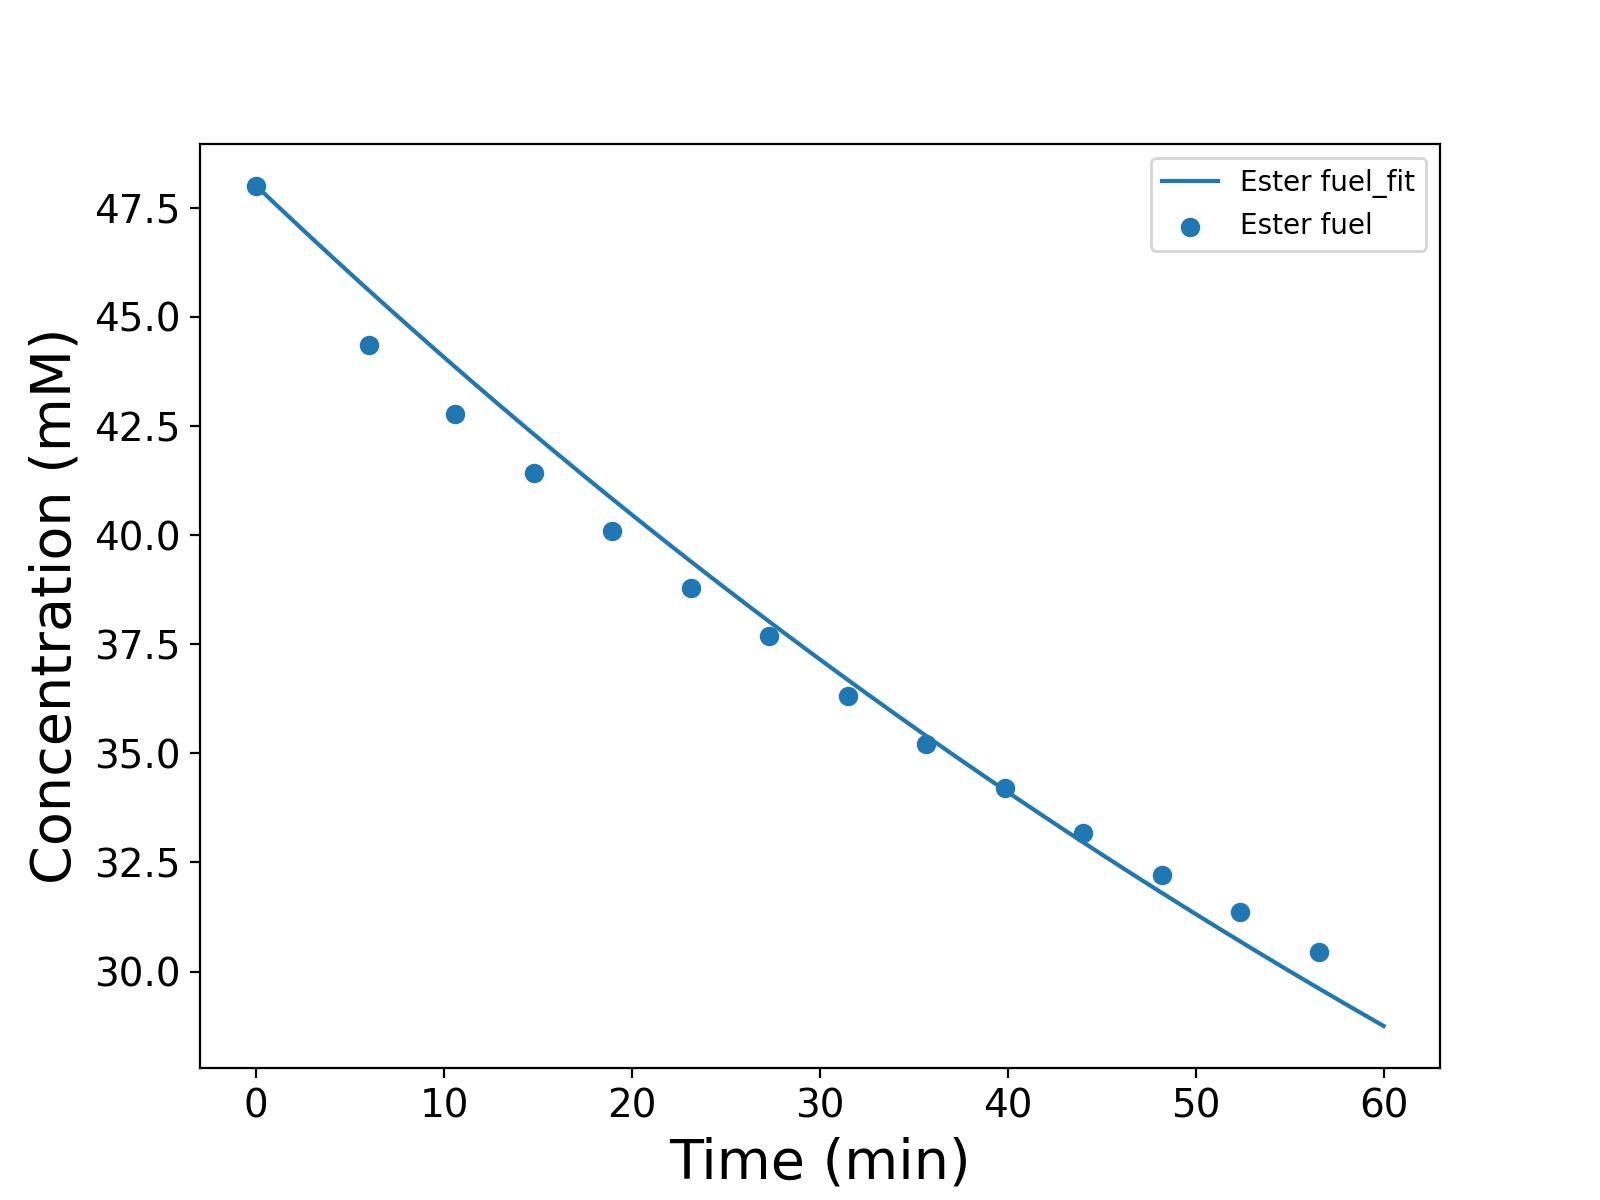

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-227-2 (pH 6.55) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [7]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-227-3.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Ester fuel,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,-360,0.000000,4695.87,6.000000,0.000,0.000000,0,0,1.0,48.000000,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,28420.5,6.052233,--
1,0,6.000000,3428.36,4.706991,941.769,1.293009,0,0,54811.2,40.090147,...,82578.1,2733.010,860.740,1314.670,12533.40,0.413073,6.014834,25815.6,5.907286,NaN
2,281,10.683333,1456.34,4.743209,385.881,1.256791,0,0,21904.5,37.042194,...,34479.6,1184.450,668.488,857.886,8782.11,0.697969,9.169416,11436.1,6.207779,NaN
3,531,14.850000,1518.22,4.976408,312.281,1.023592,0,0,20231.1,34.698139,...,31869.2,923.051,778.161,925.911,10997.00,0.821038,11.602933,11385.5,6.219882,NaN
4,782,19.033333,1546.91,5.145572,256.866,0.854428,0,0,18788.6,32.320983,...,29613.2,809.984,903.912,1047.430,13099.10,0.954131,13.826845,11466.5,6.356942,NaN


In [8]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Fuel,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,-360,0.000000,4695.87,6.000000,0.000,0.000000,0,0,1.0,48.000000,...,1.0,0.000,0.000,0.000,0.00,0.000000,0.000000,28420.5,6.052233,--
1,0,6.000000,3428.36,4.706991,941.769,1.293009,0,0,54811.2,40.090147,...,82578.1,2733.010,860.740,1314.670,12533.40,0.413073,6.014834,25815.6,5.907286,NaN
2,281,10.683333,1456.34,4.743209,385.881,1.256791,0,0,21904.5,37.042194,...,34479.6,1184.450,668.488,857.886,8782.11,0.697969,9.169416,11436.1,6.207779,NaN
3,531,14.850000,1518.22,4.976408,312.281,1.023592,0,0,20231.1,34.698139,...,31869.2,923.051,778.161,925.911,10997.00,0.821038,11.602933,11385.5,6.219882,NaN
4,782,19.033333,1546.91,5.145572,256.866,0.854428,0,0,18788.6,32.320983,...,29613.2,809.984,903.912,1047.430,13099.10,0.954131,13.826845,11466.5,6.356942,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.819940e-02 5.368304e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   10
Objective              <symfit.core.objectives.LeastSquares object at 0x7fccd889d0d0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fccd889d190>

Goodness of fit qualifiers:
chi_squared            30.809876382802678
objective_value        15.404938191401339
r_squared              0.9669646116342243


<IPython.core.display.Javascript object>


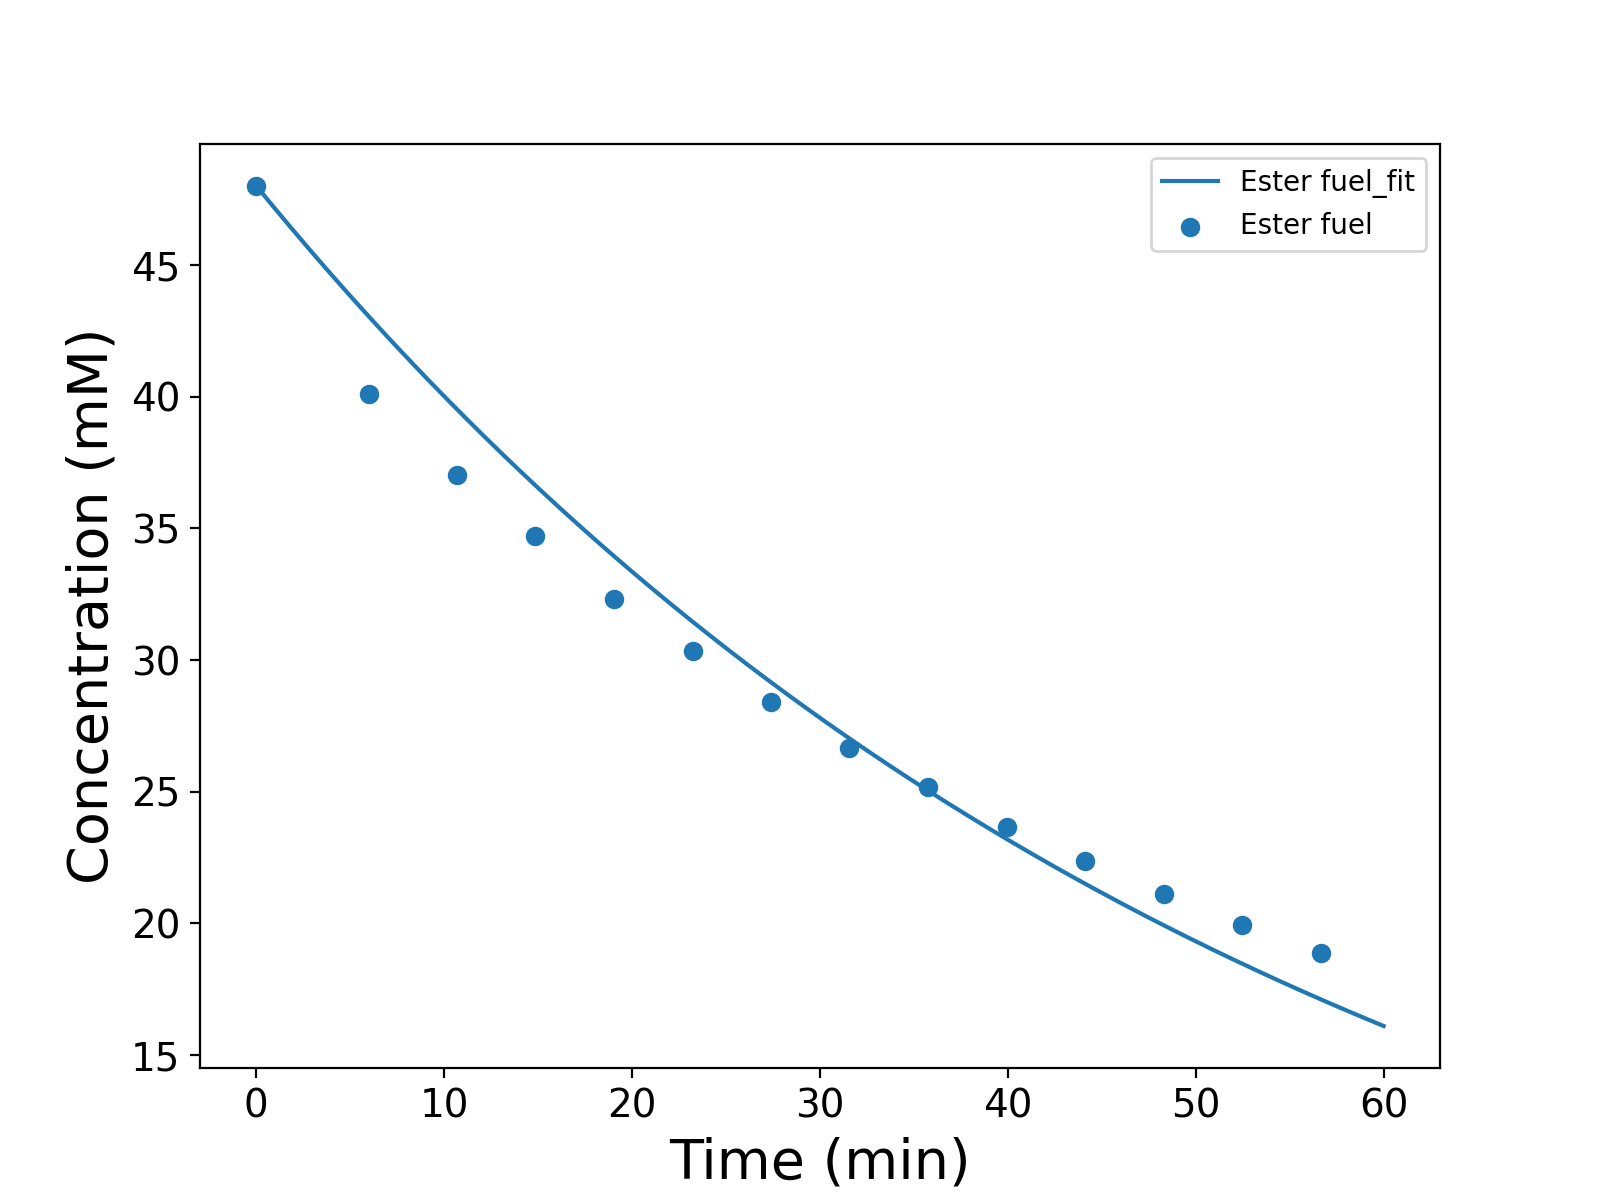

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-227-3 (pH 7.00) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [10]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-227-4.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Unnamed: 6,Other imines,Unnamed: 8,Byproducts,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,-360,0.000000,3849.350,5.999998,0.000,0.000000,0.000,0.000000,0.00000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,6.000000,1066.680,1.652164,1328.570,2.057802,226.271,0.350468,5.60192,0.008677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,294,10.900000,462.034,1.414038,510.324,1.561828,217.545,0.665788,19.36380,0.059262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,545,15.083333,533.170,1.632801,352.414,1.079247,226.879,0.694803,49.37760,0.151216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,796,19.266667,633.784,1.930353,231.772,0.705921,217.175,0.661462,62.52630,0.190440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Unnamed: 6,Other imines,Unnamed: 8,Byproducts,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,-360,0.000000,3849.350,5.999998,0.000,0.000000,0.000,0.000000,0.00000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,6.000000,1066.680,1.652164,1328.570,2.057802,226.271,0.350468,5.60192,0.008677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,294,10.900000,462.034,1.414038,510.324,1.561828,217.545,0.665788,19.36380,0.059262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,545,15.083333,533.170,1.632801,352.414,1.079247,226.879,0.694803,49.37760,0.151216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,796,19.266667,633.784,1.930353,231.772,0.705921,217.175,0.661462,62.52630,0.190440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        9.760425e-02 3.608280e-03
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fccb811fd00>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fccb81a2df0>

Goodness of fit qualifiers:
chi_squared            23.21666611228726
objective_value        11.60833305614363
r_squared              0.9891888696752044


<IPython.core.display.Javascript object>


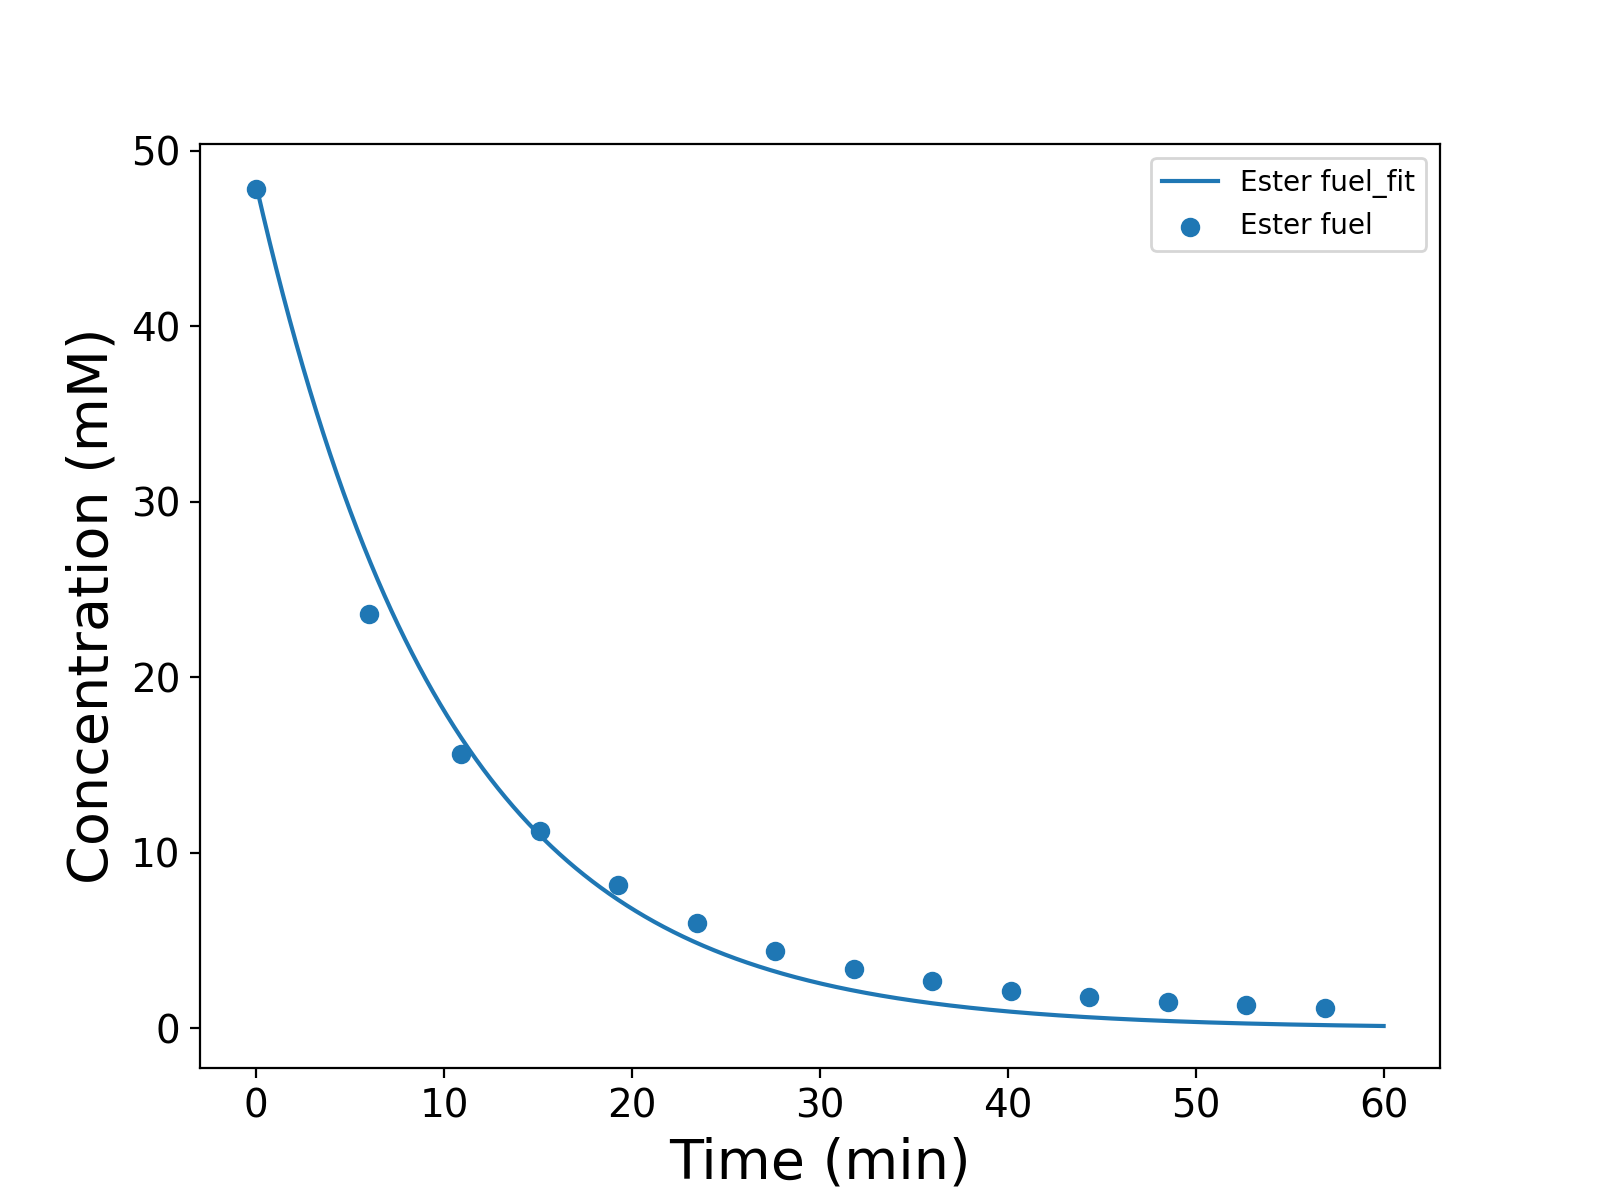

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-227-4 (pH 7.90) based on concentration. The concentration was calculated WITH an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()